In [10]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [11]:
#load/split data and preprocessing
df=pd.read_excel('../data/equipment_loss_rate.xlsx',sheet_name='warship_generate')

y=np.array(df.consume)

train,test=train_test_split(y,train_size=124)

In [12]:
#fit model
model=pm.auto_arima(train,seasonal=True,m=12)#季节性ARIMA模型，月份12

In [13]:
#make my forecasts
forecasts=model.predict(test.shape[0],return_conf_int=True,alpha=.5) #predict N steps into the future

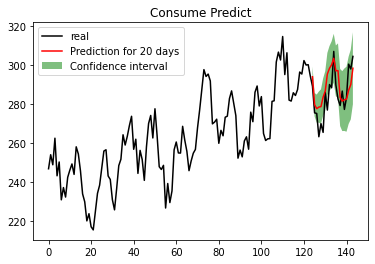

In [14]:
#visualize the forecast (blue=train, green=forecasts)
x=df.time

plt.figure()

params = {"ytick.color": "black",
          "xtick.color": "black",
          "axes.labelcolor": "black",
          "axes.edgecolor": "black"}
plt.rcParams.update(params)

plt.title("Consume Predict", color="black")

x_plot=list(range(144))
plt.plot(x_plot,df.consume,c='black',label='real')
plt.plot(x_plot[124:],forecasts[0],c='red',label=f'Prediction for {test.shape[0]} days')
plt.fill_between(x=x_plot[124:],
                 y1=forecasts[1][:,0],
                 y2=forecasts[1][:,1],
                 facecolor='green',
                 alpha=0.5,
                 label='Confidence interval')

plt.legend()
plt.savefig('../image/predict_ARIMA.jpg')